ECGR 4105 Homework 3 | Khang Vu 801059139 | 10/22/2022

In this homework, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this homework across all problems, use 80%, 20% split.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
import warnings
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import random

Problem 1

Use the cancer dataset to build a Naïve Bayesian model to classify the type of cancer (Malignant vs. benign). Plot your classification accuracy, precision, and recall. Explain and elaborate on your results. Can you compare your results against the logistic regression classifier you did in previous homework.

In [2]:
dataset = datasets.load_breast_cancer()
model = GaussianNB()
model.fit(dataset.data,dataset.target)

GaussianNB()

In [3]:
predicted = model.predict(dataset.data)
expected = dataset.target

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       212
           1       0.94      0.97      0.95       357

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569

[[189  23]
 [ 10 347]]


In [4]:
print("Accuracy:",metrics.accuracy_score(expected, predicted))
print("Precision:",metrics.precision_score(expected, predicted))
print("Recall:",metrics.recall_score(expected, predicted))

Accuracy: 0.9420035149384886
Precision: 0.9378378378378378
Recall: 0.9719887955182073


Problem 2

Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest classification accuracy. Plot your classification accuracy, precision, and recall over a different number of Ks. Explain and elaborate on your results.

In [5]:
dataset = load_breast_cancer()
input = pd.DataFrame(dataset.data)
input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
labels = dataset.target
labels = np.reshape(labels,(569,1))
cancer = np.concatenate([input,labels],axis=1)

In [7]:
cancer = pd.DataFrame(cancer)
features = dataset.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
features_label = np.append(features,'test')
cancer.columns = features_label
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,test
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [9]:
X = cancer.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
Y = cancer.iloc[:,30].values

#Feature Scaling for better accuracy
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 0)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [10]:
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[47,  0],
       [ 0, 67]])

In [12]:
#Metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
average = (accuracy+precision+recall)/3

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("Average:",average)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Average: 1.0


In [13]:
#PCA 
x = cancer.loc[:,features].values
y = cancer.loc[:,['test']].values

x = StandardScaler().fit_transform(x)

In [14]:
#Create graphs
accuracyGraph = []
precisionGraph = []
recallGraph = []

In [15]:
#K-loop
for k in range(1,31):
  pca = PCA(n_components=k)
  principalComponents = pca.fit_transform(x)
  principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
  finalDF = pd.concat([principalDf, cancer[['test']]], axis=1)
  outcome = finalDF.pop("test")

  x2 = finalDF.values
  y2 = outcome.values
  X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)
  classifier.fit(X_train, Y_train)

  Y_pred = classifier.predict(X_test)

  cnf_matrix = confusion_matrix(Y_test, Y_pred)

  accuracy = metrics.accuracy_score(Y_test, Y_pred)
  accuracyGraph.append(accuracy)
  precision = metrics.precision_score(Y_test, Y_pred)
  precisionGraph.append(precision)
  recall = metrics.recall_score(Y_test, Y_pred)
  recallGraph.append(recall)
  newAverage = (accuracy+precision+recall)/3
  if average<newAverage:
    average = newAverage
    index=k

In [16]:
#PCA
pca = PCA(n_components=k)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
final_df =pd.concat([principalDf, cancer[['test']]], axis=1)

x2 = final_df.values
y2 = outcome.values
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [17]:
Y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)

#Metrics
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))
print("Recall:",metrics.recall_score(Y_test,Y_pred))
print("Final k: ", k)

Accuracy: 0.9912280701754386
Precision: 0.9852941176470589
Recall: 1.0
Final k:  30


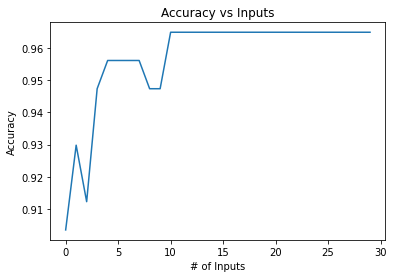

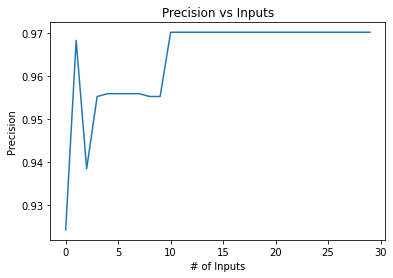

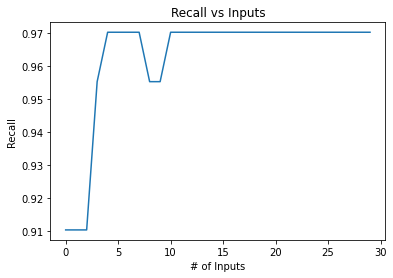

In [18]:
#Graphs
plt.plot(accuracyGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Inputs')
plt.show()

plt.plot(precisionGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Precision')
plt.title('Precision vs Inputs')
plt.show()

plt.plot(recallGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Recall')
plt.title('Recall vs Inputs')
plt.show()

Problem 3

Can you repeat problem 2? This time, replace logistic regression with the Bayes classifier. Report your results (classification accuracy, precision, and recall). Compare your results against problem 2.

In [19]:
dataset = load_breast_cancer()
input = pd.DataFrame(dataset.data)
input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
labels = dataset.target
labels = np.reshape(labels,(569,1))
cancer = np.concatenate([input,labels],axis=1)

In [21]:
cancer = pd.DataFrame(cancer)
features = dataset.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [22]:
features_label = np.append(features,'test')
cancer.columns = features_label
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,test
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [23]:
X = cancer.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
Y = cancer.iloc[:,30].values

#Feature Scaling for better accuracy
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [24]:
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [25]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[47,  0],
       [ 0, 67]])

In [26]:
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
average = (accuracy+precision+recall)/3

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("Average:",average)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Average: 1.0


In [27]:
# PCA Function

x = cancer.loc[:,features].values
y = cancer.loc[:,['test']].values

x = StandardScaler().fit_transform(x)

accuracyGraph = []
precisionGraph = []
recallGraph = []

In [28]:
# K-loop
for k in range(1,31):
  pca = PCA(n_components=k)
  principalComponents = pca.fit_transform(x)
  principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
  final_df = pd.concat([principalDf, cancer[['test']]], axis=1)
  outcome = final_df.pop("test")

  x2 = final_df.values
  y2 = outcome.values
  X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)
  classifier.fit(X_train, Y_train)

  Y_pred = classifier.predict(X_test)
  cnf_matrix = confusion_matrix(Y_test, Y_pred)

  accuracy = metrics.accuracy_score(Y_test, Y_pred)
  accuracyGraph.append(accuracy)
  precision = metrics.precision_score(Y_test, Y_pred)
  precisionGraph.append(precision)
  recall = metrics.recall_score(Y_test, Y_pred)
  recallGraph.append(recall)
  newAverage = (accuracy+precision+recall)/3
  if average<newAverage:
    average = newAverage
    index=k

In [29]:
pca = PCA(n_components=k)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
final_df =pd.concat([principalDf, cancer[['test']]], axis=1)

x2 = final_df.values
y2 = outcome.values
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)
classifier.fit(X_train, Y_train)

GaussianNB()

In [30]:
Y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)

print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))
print("Recall:",metrics.recall_score(Y_test,Y_pred))
print("Final k: ", k)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Final k:  30


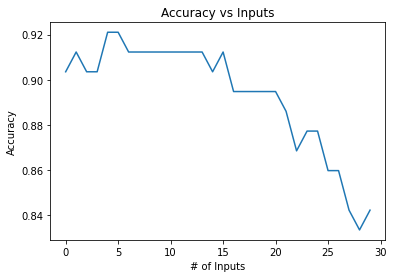

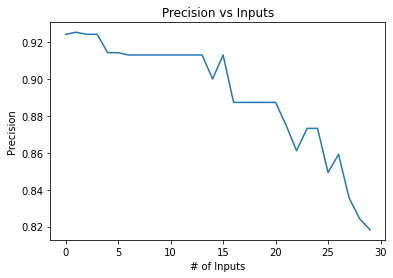

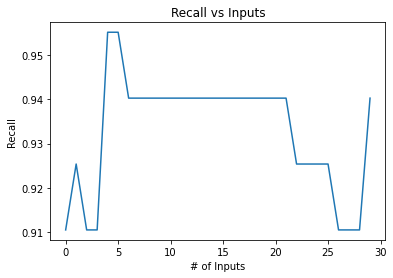

In [31]:
#Graphs
plt.plot(accuracyGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Inputs')
plt.show()

plt.plot(precisionGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Precision')
plt.title('Precision vs Inputs')
plt.show()

plt.plot(recallGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Recall')
plt.title('Recall vs Inputs')
plt.show()